In [84]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [104]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [86]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, String, Integer, Float

In [87]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [88]:
# reflect an existing database into a new model
Base = automap_base()

Base.metadata.create_all(engine)

# reflect the tables
Base.prepare(autoload_with=engine)


In [89]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [90]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [32]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [91]:
# Find the most recent date in the data set.
    
most_recent_date = session.query(func.max(measurement.date)).scalar()
print(most_recent_date)

2017-08-23


Text(0, 0.5, 'Inches')

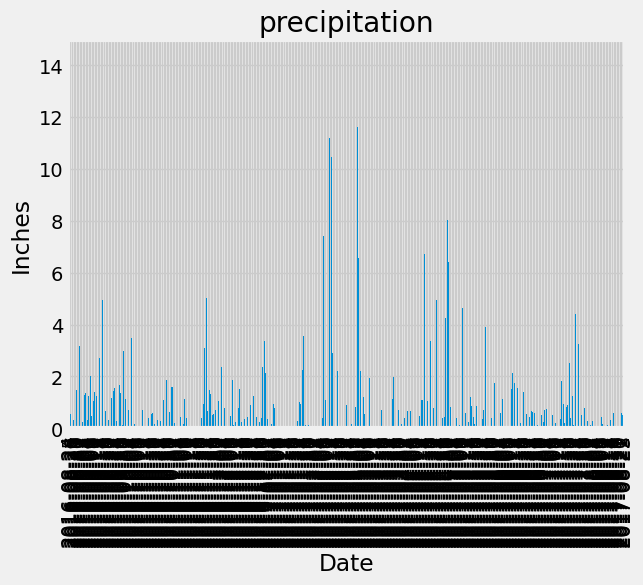

In [125]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
year_before = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()
#print(year_before)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_before)
df.columns = ['date', 'prcp']
df

# Sort the dataframe by date
df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp = df.groupby('date')['prcp'].sum().plot(kind='bar', title='precipitation')

plt.xlabel('Date')
plt.ylabel('Inches')

In [127]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary = df.describe()
summary

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
#total_stations = session.query(station.name)
rows = session.query(station).count()
print(rows)

9


In [171]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station).\
    group_by(measurement.station)


#count = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00519397').scalar()
count1 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00519281').scalar()
print('USC00519281', count1)
count2 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00519397').scalar()
print('USC00519397', count2)
count3 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00513117').scalar()
print('USC00513117', count3)
count4 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00519523').scalar()
print('USC00519523', count4)
count5 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00516128').scalar()
print('USC00516128', count5)
count6 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00514830').scalar()
print('USC00514830', count6)
count7 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00511918').scalar()
print('USC00511918', count7)
count8 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00517948').scalar()
print('USC00517948', count8)
count9 = session.query(func.count(measurement.station)).filter(measurement.station == 'USC00518838').scalar()
print('USC00518838', count9)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [183]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active = session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    order_by(measurement.station).all()
most_active

lowest = session.query(func.min(measurement.tobs)).scalar()
print(lowest)
highest = session.query(func.max(measurement.tobs)).scalar()
print(highest)
average = session.query(func.avg(measurement.tobs)).scalar()
print(average)

53.0
87.0
73.09795396419437


Text(0, 0.5, 'Frequency')

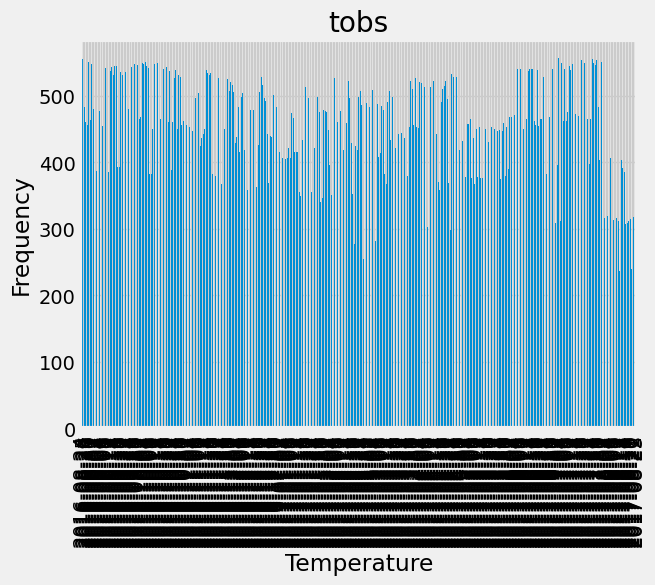

In [201]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

one_year_temp = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

df = pd.DataFrame(one_year_temp)
df.columns = ['date', 'tobs']
df

df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
date_tobs = df.groupby('date')['tobs'].sum().plot(kind='bar', title='tobs')

plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [202]:
# Close Session
session.close()